File Name,Color Model,Format,Channels,File Size (MB),Width,Height,Thumbnail
1.jpg,RGB,JPEG,3,0.05,600,375,
20201016122530_.jpeg,RGB,JPEG,3,0.16,500,281,
4_fraktal3608ab310dc594c738706a02f4962899f.jpg,RGB,JPEG,3,0.04,400,300,
BB-Images-400-x-200px-UPLOAD.jpg,RGB,JPEG,3,0.30,833,417,
cat-1433141_1280.jpg,RGB,JPEG,3,0.44,1280,854,
depositphotos_11640933-stock-photo-top-view-of-norway-maple.jpg,RGB,WEBP,3,0.08,600,600,
greg-rakozy-ompaz-dn-9i-unsplash-1.jpg,RGB,JPEG,3,0.05,800,533,
istockphoto-1399246824-612x612.jpg,RGB,JPEG,3,0.04,612,344,
istockphoto-2152193820-612x612.jpg,RGB,JPEG,3,0.03,612,408,
media_177a37ad6311aa673bfb58ba711dbcc320ae65c5a.jpeg,RGB,JPEG,3,0.08,750,362,

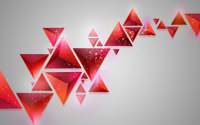
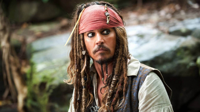
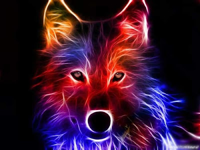
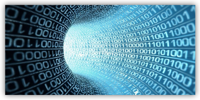
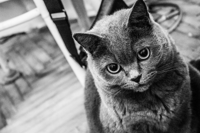
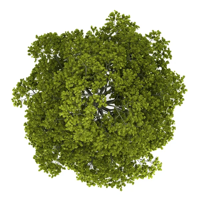
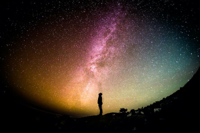
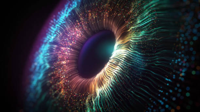
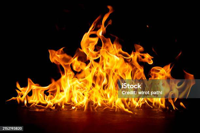
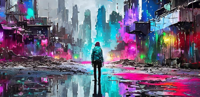
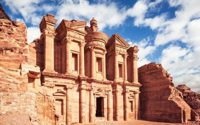
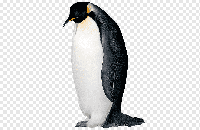
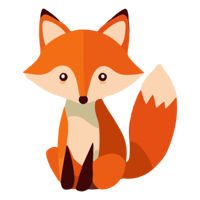
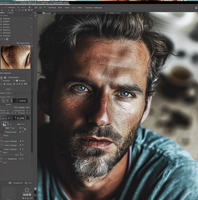
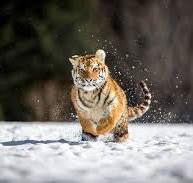

In [1]:
import os
import pandas as pd
from PIL import Image
from IPython.display import HTML, display
from io import BytesIO
import base64

def analyze_images(folder_path):

    image_data = [] 

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        try:
            with Image.open(file_path) as img:
                file_size = os.path.getsize(file_path) / (1024 * 1024) 
                width, height = img.size
                color_model = img.mode
                format_img = img.format

                thumbnail = img.copy()
                thumbnail.thumbnail((200, 200))
                buffer = BytesIO()
                thumbnail.save(buffer, format="PNG")
                encoded_thumbnail = base64.b64encode(buffer.getvalue()).decode("utf-8")

                image_data.append({
                    "File Name": file_name,
                    "Color Model": color_model,
                    "Format": format_img,
                    "Channels": len(img.getbands()),
                    "File Size (MB)": round(file_size, 2),
                    "Width": width,
                    "Height": height,
                    "Thumbnail": f'<img src="data:image/png;base64,{encoded_thumbnail}" width="50" height="50"/>'
                })
        except Exception as e:
            print(f"Skipping file: {file_name}, Error: {e}")
    
    df = pd.DataFrame(image_data)
    return df

def display_html_table(df):

    html_table = df.to_html(escape=False, index=False)
    display(HTML(html_table))

folder = "images"  
df = analyze_images(folder)

if not df.empty:
    display_html_table(df)
else:
    print("No images found in the folder!")


In [2]:
import random
from PIL import Image, ImageEnhance, ImageFilter
from IPython.display import display 

def preprocess_image(image, size):

    if image.mode != "RGB":
        image = image.convert("RGB")
    
    min_side = min(image.size)
    cropped_image = image.crop((
        (image.width - min_side) // 2,
        (image.height - min_side) // 2,
        (image.width + min_side) // 2,
        (image.height + min_side) // 2
    ))
    resized_image = cropped_image.resize((size, size), Image.LANCZOS)
    return resized_image

def apply_random_filter(image):

    filters = [
        lambda img: ImageEnhance.Color(img).enhance(random.uniform(0.8, 1.2)),
        lambda img: ImageEnhance.Contrast(img).enhance(random.uniform(0.9, 1.1)),
        lambda img: ImageEnhance.Brightness(img).enhance(random.uniform(0.9, 1.1)),
    ]
    enhancer = random.choice(filters)
    return enhancer(image)

def create_poster(folder_path, output_file, rows, cols, image_size=500):

    image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)
                   if f.endswith(('png', 'jpg', 'jpeg'))]
    
    if not image_files:
        raise ValueError("No valid images found in the folder!")

    poster_width = cols * image_size
    poster_height = rows * image_size
    poster = Image.new("RGB", (poster_width, poster_height), "white")

    for row in range(rows):
        for col in range(cols):
            img_path = random.choice(image_files)
            with Image.open(img_path) as img:
                img = preprocess_image(img, image_size)
                img = apply_random_filter(img)

                x = col * image_size
                y = row * image_size
                poster.paste(img, (x, y))

    poster.save(output_file, quality=95)  
    print(f"Poster saved as {output_file}")
    
    display(poster)  

Poster saved as poster4_high_quality.jpg


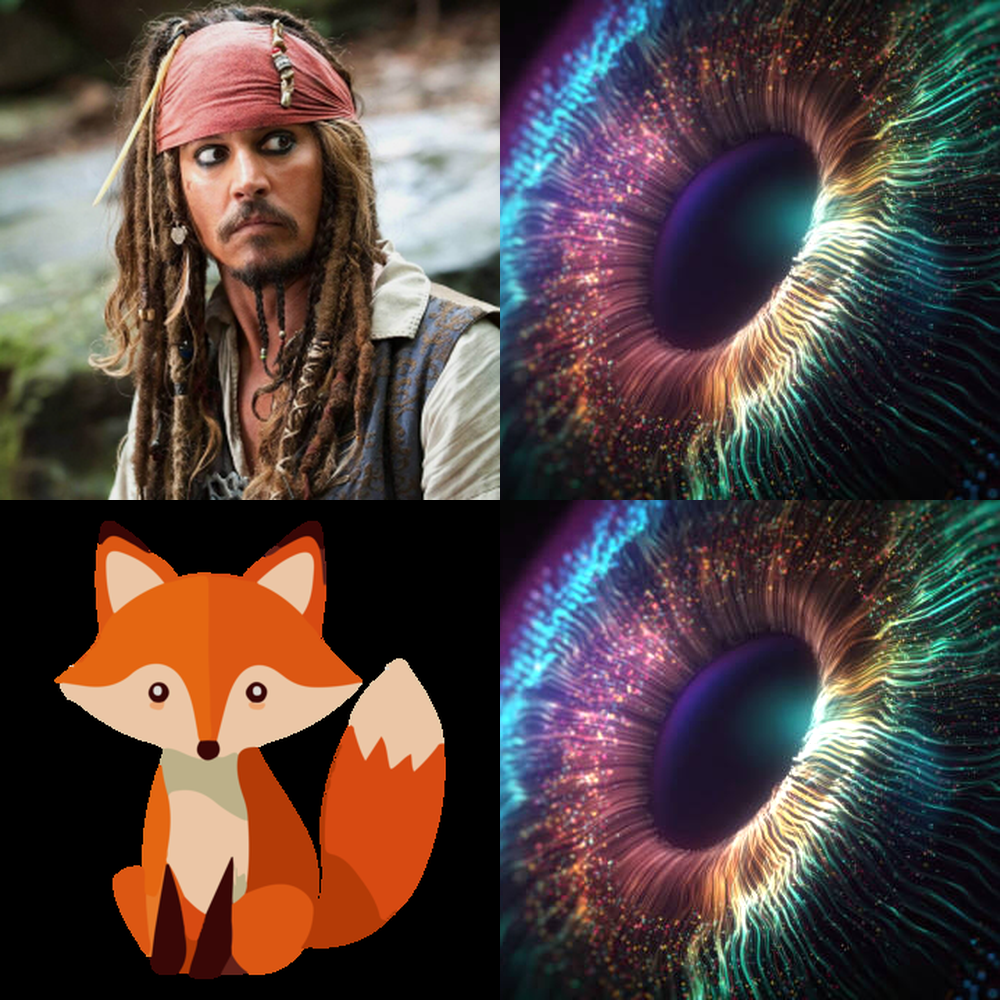

In [3]:
folder = "images"  
create_poster(folder, "poster4_high_quality.jpg", rows=2, cols=2, image_size=500)